In [ ]:
SEED = 42

import os
os.environ['PYTHONHASHSEED']=str(SEED)

import random
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import tensorflow as tf
tf.random.set_seed(SEED)

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil
import cv2
import math
import glob
from PIL import Image
from collections import Counter

from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import random
import cv2
import os
from PIL import Image

from keras.layers import *
from keras.models import *
import keras

In [ ]:
SEED = 42

import os
os.environ['PYTHONHASHSEED']=str(SEED)

import random
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import tensorflow as tf
tf.random.set_seed(SEED)

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil
import cv2
import math
import glob
from PIL import Image
from collections import Counter

from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import random
import cv2
import os
from PIL import Image

from keras.layers import *
from keras.models import *
import keras

In [ ]:
resnet_weights_path = 'C:/Users/user/PycharmProjects/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    height, width, _ = img.shape

    # Calculate padding needed to make the image square
    pad_horiz = max(0, (height - width) // 2)

    # Add padding to the sides
    img = cv2.copyMakeBorder(img, 0, 0, pad_horiz, pad_horiz, cv2.BORDER_CONSTANT, value=[255, 255, 255])

    # Resize to 224x224
    img = cv2.resize(img, (image_size, image_size))

    return img

In [ ]:
data = []
labels = []

In [ ]:
image_size = 224
batch_size = 64

In [ ]:
for folder in [ "C:\\Users\\user\\Desktop\\New folder (7)\\Val"]:
    for class_label in os.listdir(folder):
        class_path = os.path.join(folder, class_label)
        for image_file_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file_name)

            # Preprocess the image
            processed_image = preprocess_image(image_path)

            # Append the preprocessed image to the data list
            data.append(processed_image)

            # Assign label based on folder name
            label = 0 if class_label.lower() == 'man' else 1
            labels.append(label)

# Convert lists to NumPy arrays
data = np.array(data)
labels = np.array(labels)

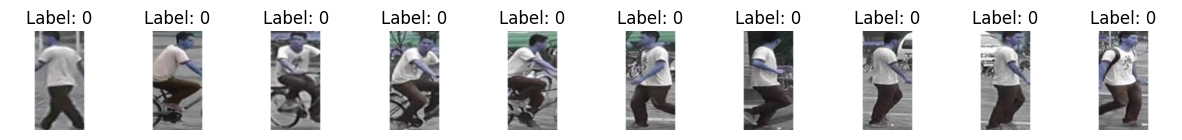

In [ ]:
import matplotlib.pyplot as plt

# Function to display photos
def display_photos(images, labels):
    plt.figure(figsize=(15, 3))
    for i in range(10):
        plt.subplot(1, 10, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

# Display 10 photos from the dataset
display_photos(data, labels)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=SEED)

In [ ]:
train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    width_shift_range=0.4,
    height_shift_range=0.4,
    zoom_range=0.3,
    rotation_range=20,
    rescale=1./255
)

# Data normalization for validation set
test_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau

es = EarlyStopping(patience=5, monitor = 'val_accuracy')
rlp = ReduceLROnPlateau(patience=5, monitor = 'val_accuracy')

callbacks = [es, rlp]

train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range = 0.4,
                                   height_shift_range = 0.4,
                                   zoom_range=0.3,
                                   rotation_range=20,
                                   rescale = 1./255
                                   )

test_gen = ImageDataGenerator(rescale = 1./255)

In [ ]:

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
validation_generator = test_gen.flow(X_val, y_val, batch_size=batch_size)

In [ ]:
model = Sequential()
model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
model.layers[0].trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
es = EarlyStopping(patience=5, monitor='val_accuracy')
rlp = ReduceLROnPlateau(patience=5, monitor='val_accuracy')
callbacks = [es, rlp]

# Train the model
model.fit(train_generator, epochs=8, validation_data=validation_generator, callbacks=callbacks)


Epoch 1/8
42/42 [==============================] - 298s 7s/step - loss: 1.1655 - accuracy: 0.5542 - val_loss: 0.6914 - val_accuracy: 0.4962 - lr: 0.0010
Epoch 2/8
42/42 [==============================] - 261s 6s/step - loss: 0.7077 - accuracy: 0.5885 - val_loss: 1.0359 - val_accuracy: 0.3831 - lr: 0.0010
Epoch 3/8
42/42 [==============================] - 251s 6s/step - loss: 0.7011 - accuracy: 0.5783 - val_loss: 0.7747 - val_accuracy: 0.3831 - lr: 0.0010
Epoch 4/8
42/42 [==============================] - 241s 6s/step - loss: 0.7089 - accuracy: 0.5647 - val_loss: 0.7161 - val_accuracy: 0.4947 - lr: 0.0010
Epoch 5/8
21/42 [==============>...............] - ETA: 1:41 - loss: 0.7044 - accuracy: 0.5670